<a target="_blank" href="https://colab.research.google.com/github/sonder-art/automl_o23/blob/main/codigo/intro_redes_neuronales/aprendizaje_profundo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
# Apply the default theme
sns.set_style('darkgrid')


# Funciones de Activacion

A continuacion te presentamos algunas funciones de activacion y como llamarlas en pytorch. Podemos observar los diferentes valores que toman.

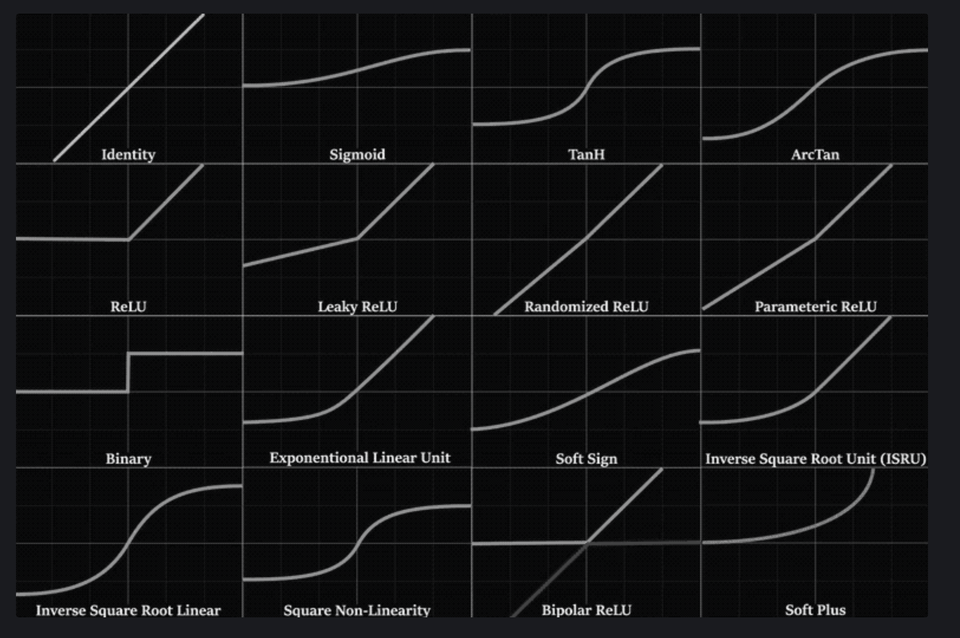

In [ ]:
def df_act(fun, name, x):
  df_act = pd.DataFrame({
    'x' : x.numpy(),
    'y' : fun(x).numpy()
    })
  df_act['activation'] = name
  return df_act

La documentacion de Pytorch para las funciones de activacion se encuentra en:  
https://pytorch.org/docs/stable/nn.html#non-linear-activations-other

In [ ]:
df = []

x_1 = torch.tensor([-10.0, -5.0, -4.0, -3.0, -2.0 -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0,
                  10.0])
x_0 = torch.tensor(np.arange(-2.0, 2.0, .005))
x = torch.cat((x_0, x_1), 0)

# Softmax
smax = nn.Softmax(dim=0)
df.append(df_act(smax, 'softmax', x))

# Sigmoid
sig = nn.Sigmoid()
df.append(df_act(sig, 'sigmoid', x))

# Tanh
tanh = nn.Tanh()
df.append(df_act(tanh, 'tanh', x))

# ReLu
relu = nn.ReLU()
df.append(df_act(relu, 'relu', x))

# leakyrelu, puede recibir el parametro negative_slope
lrelu = nn.LeakyReLU(negative_slope=-.1)
df.append(df_act(lrelu, 'lrelu', x))

df = pd.concat(df, ignore_index=True)
df.head(3)

,x,y,activation
0,-2.000,0.000006,softmax
1,-1.995,0.000006,softmax
2,-1.990,0.000006,softmax


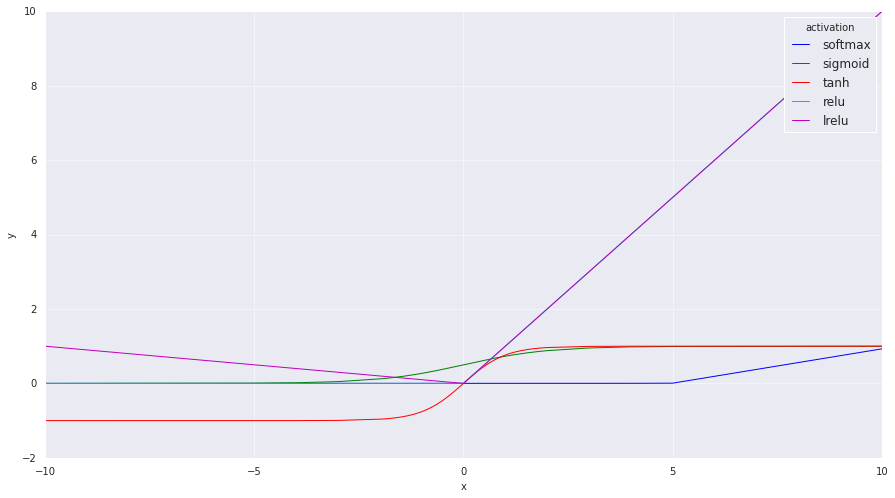

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='x', y='y', hue='activation')

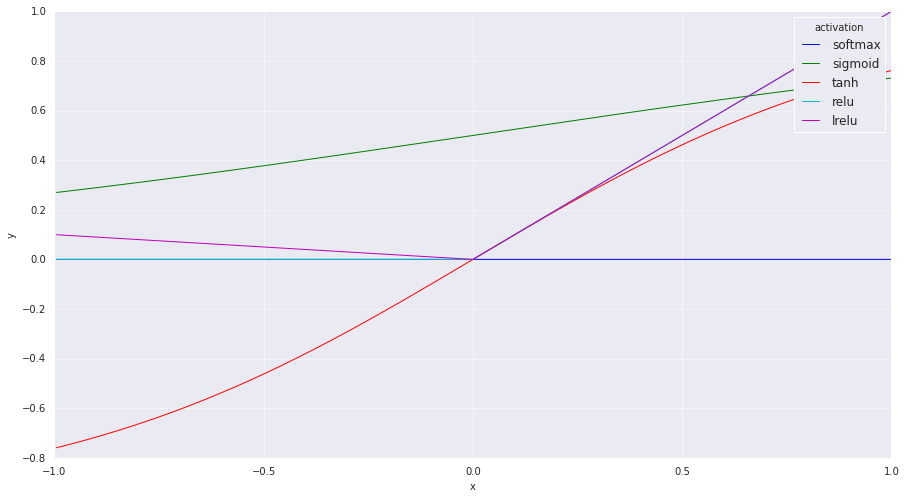

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df[(df['x']<=1.0) & (df['x']>=-1.0)], x='x', y='y', hue='activation')

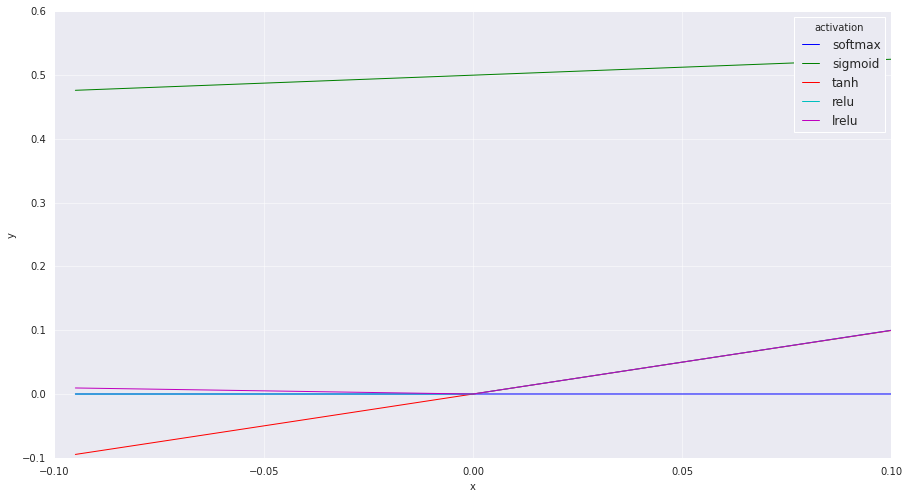

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df[(df['x']<=.1) & (df['x']>=-.1)], x='x', y='y', hue='activation')

# CNN en MNIST

In [ ]:


#Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')



In [ ]:
# Diccionarios de argumentos
args={}
kwargs={}

# Tamano de lote o Batch
args['batch_size']=1000
args['test_batch_size']=1000

# Hyperparametros de Entrenamiento
# Epoca:= El numero de veces por el que pasamos por todos los datos
args['epoch']=10  
# La tasa de aprendizaje del descenso por gradiente 
args['lr']=0.01 
# El momento o momentum del descenso por gradiente
args['momentum']=0.5 

# Parametros de Pytorch
# Semilla aleatoria
args['seed']=345 
args['log_interval']=10
# Usar GPU si existe (cuda), de lo contrario cpu.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()
args['cuda']= device

Using device: cuda



In [ ]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='../data', 
                   train=True, 
                   download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], 
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', 
                   train=False, 
                   download = True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], 
    shuffle=True)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


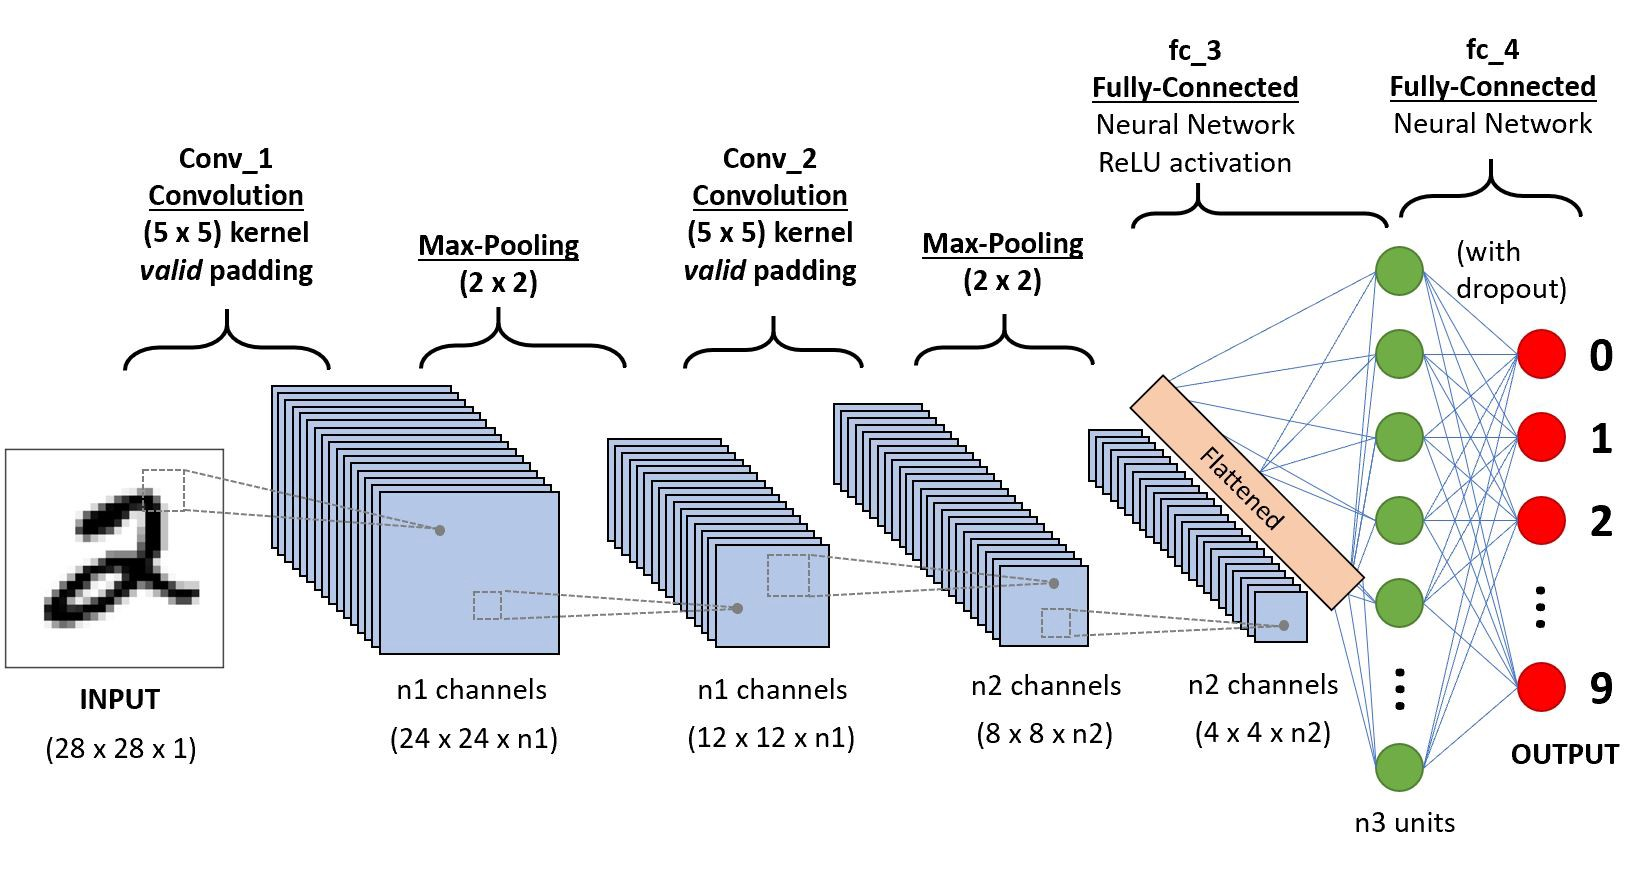

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, 
                                      kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64,
                                      kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)

        return pred

In [ ]:
def prueba(model, test_loader, args):
    # Cambia el modelo a modo evaluacion, por ejemplo elimina el dropout
    model.eval()
    # Variables oara accumular en el loop
    test_loss = 0
    correct = 0

    # Iterar sobre los batches/lotes de prueba
    for data, target in test_loader:

        # Carga los tensores a GPU de ser necesario
        if args['cuda'] == 'cuda':
            data, target = data.cuda(), target.cuda()

        # Resultado del feedforward
        output = model(data)

        # Funcion de perdida en el batch, Cross-Entropy
        test_loss += F.cross_entropy(output, target, reduction='sum').item()

        # Obtener la neurona -> label con mayor probabilidad
        # La neurona k corresponde al numero k o etiqueta k.
        pred = output.data.max(1, keepdim=True)[1] 

        # Numero de predicciones correctas, .cpu() copia los tensores al cpu
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
    
    # % de obsrvaciones correctas
    test_loss /= len(test_loader.dataset)
    print('\n Datos de Prueba: Perdida: {:.3f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    


 Datos de Prueba: Perdida: 2.298, Accuracy: 1310/10000 (13%)



In [ ]:

model_nn =  CNN()
prueba(model = model_nn, test_loader=test_loader, args=args)


 Datos de Prueba: Perdida: 2.304, Accuracy: 1409/10000 (14%)



In [ ]:
def entrenamiento(model, train_loader, args, epoch):
    # Pone al modelo en modo entrenamiento. Calcula autograd, y activa el dropout.
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # carga las matrices al GPU de ser necesario
        if args['cuda'] == 'cuda':
            data, target = data.cuda(), target.cuda()

        # Convierte el tensor a Variable para calcular la derivada 
        data, target = data, target

        # Reinicia el gradiente del lote a 0
        optimizer.zero_grad()

        # Feedforward
        output = model(data)

        # Calcula la perdida Cross-Entropy
        loss = torch.nn.CrossEntropyLoss()        
        loss = loss(output, target)

        # Calcula el gradiente (backward) 
        loss.backward()

        # Optimiza/recalcula los pesos
        optimizer.step()

        # Imprime la perdida. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
args['lr']=0.05
model_nn = CNN()
optimizer = optim.SGD(model_nn.parameters(), lr=args['lr'],
                      momentum=args['momentum'])

for epoch in range(0, args['epoch']):
    entrenamiento(model = model_nn, train_loader=train_loader, args=args, 
                  epoch=epoch)
    prueba(model = model_nn, test_loader=test_loader, args=args)



Train Epoch: 0 [0/60000 (0%)]	Loss: 2.302856
Train Epoch: 0 [10000/60000 (17%)]	Loss: 1.841918
Train Epoch: 0 [20000/60000 (33%)]	Loss: 1.347311
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.702754
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.608022
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.518969

 Datos de Prueba: Perdida: 0.275, Accuracy: 9247/10000 (92%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.420163
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.381896
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.374665
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.303649
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.280494
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.283577

 Datos de Prueba: Perdida: 0.169, Accuracy: 9482/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.255610
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.243416
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.237600
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.243781
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.211264
Train Epoch: 2 [50000/60000 (83%)]	Loss